## __2.0. Imputação com Redes Neurais__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import autoimpute as imp

import sys
sys.path.insert(0, '../src')

In [2]:
from modulos.tools import subes, missingAnalysis

In [3]:
jps = subes('JPS')

In [4]:
jps.missing()

In [5]:
jps.df.isna().sum()

JPS_TIPO_12B1_WATT    5719
JPS_TIPO_12B2_WATT    5173
JPS_TIPO_11B1_WATT    5141
JPS_TIPO_11B2_WATT    5591
JPS_TIPO_21L1_WATT    4604
JPS_TIPO_21L2_WATT    5828
JPS_TIPO_21L3_WATT    4666
JPS_TIPO_21L4_WATT    4649
JPS_TIPO_21L5_WATT    4667
JPS_TIPO_21L6_WATT    4683
JPS_TIPO_21L7_WATT    4847
JPS_TIPO_21L8_WATT    4663
JPS_TIPO_21L9_WATT    4878
dtype: int64

### __Autcorrelação__

#### __Completa__

In [6]:
col = 'JPS_TIPO_12B1_WATT'

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline


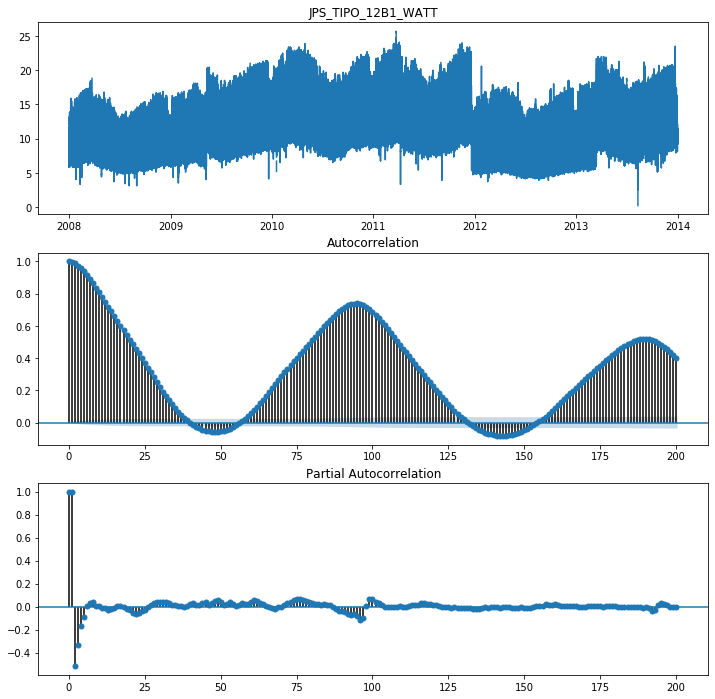

In [11]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams.update({'figure.figsize':(12,12)})

fig, ax = plt.subplots(3, )
ax[0].plot(jps.df[col]) 
ax[0].set_title(col)
plot_acf(jps.df[col].dropna(), ax=ax[1],lags = 200)
plot_pacf(jps.df[col].dropna(), ax=ax[2],lags = 200)

plt.show()


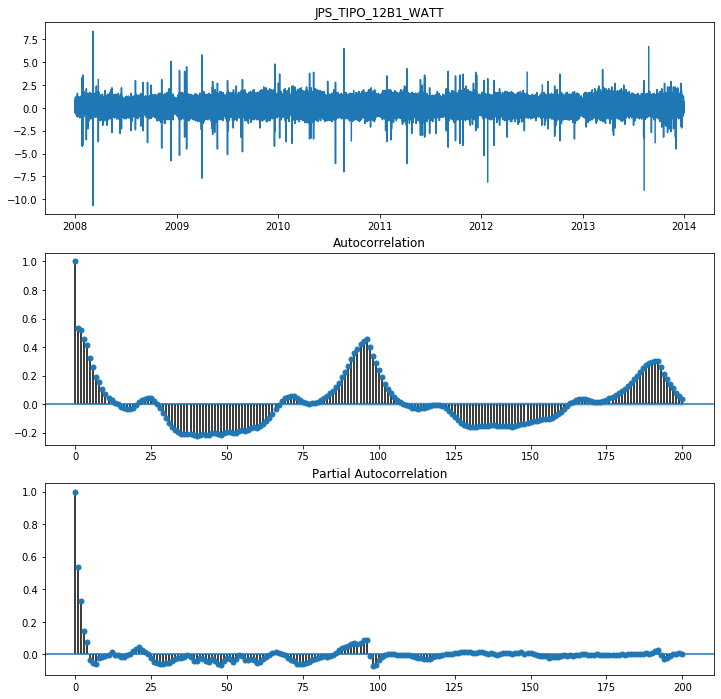

In [12]:
fig, ax = plt.subplots(3, )
ax[0].plot(jps.df[col].diff()) 
ax[0].set_title(col)
plot_acf(jps.df[col].diff().dropna(), ax=ax[1],lags = 200)
plot_pacf(jps.df[col].diff().dropna(), ax=ax[2], lags = 200)

plt.show()

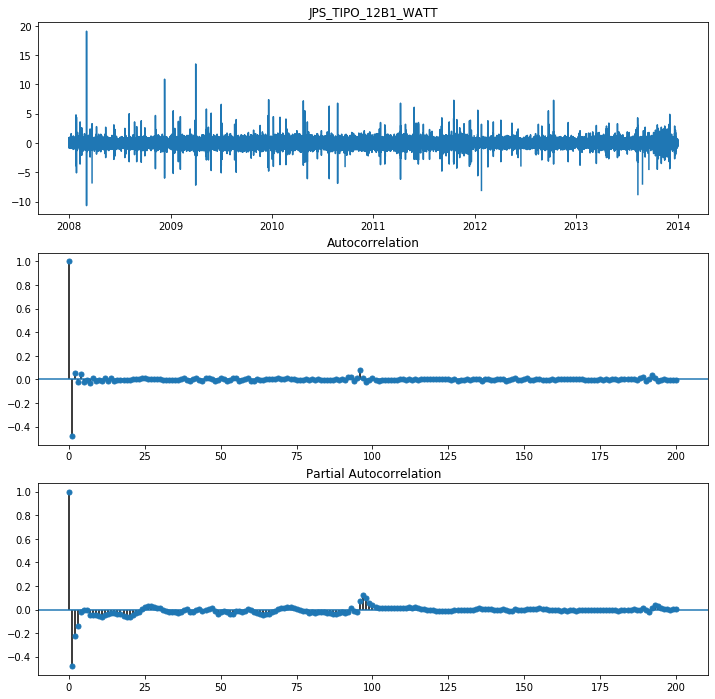

In [13]:
fig, ax = plt.subplots(3, )
ax[0].plot(jps.df[col].diff().diff()) 
ax[0].set_title(col)
plot_acf(jps.df[col].diff().diff().dropna(), ax=ax[1],lags = 200)
plot_pacf(jps.df[col].diff().diff().dropna(), ax=ax[2], lags = 200)

plt.show()

In [21]:
miss = missingAnalysis(jps.df)
miss.count_gaps(jps.cols[1:2])

Gaps em ordem decrescente:
[[Timestamp('2012-12-28 08:00:00'), 703], [Timestamp('2012-02-25 00:45:00'), 499], [Timestamp('2012-02-14 09:15:00'), 399], [Timestamp('2010-03-22 15:15:00'), 353], [Timestamp('2012-03-10 16:00:00'), 319], [Timestamp('2009-03-01 18:45:00'), 253], [Timestamp('2009-05-11 08:30:00'), 223], [Timestamp('2013-01-02 08:00:00'), 203], [Timestamp('2013-08-29 08:30:00'), 197], [Timestamp('2013-10-09 15:45:00'), 197]]


In [22]:
gaps = miss.gaps[jps.cols[1]]

In [25]:
gaps.sort(key=lambda x : x[1], reverse = True)
gaps

[[Timestamp('2012-12-28 08:00:00'), 703],
 [Timestamp('2012-02-25 00:45:00'), 499],
 [Timestamp('2012-02-14 09:15:00'), 399],
 [Timestamp('2010-03-22 15:15:00'), 353],
 [Timestamp('2012-03-10 16:00:00'), 319],
 [Timestamp('2009-03-01 18:45:00'), 253],
 [Timestamp('2009-05-11 08:30:00'), 223],
 [Timestamp('2013-01-02 08:00:00'), 203],
 [Timestamp('2013-08-29 08:30:00'), 197],
 [Timestamp('2013-10-09 15:45:00'), 197],
 [Timestamp('2013-04-08 09:45:00'), 191],
 [Timestamp('2013-12-19 09:45:00'), 185],
 [Timestamp('2012-01-25 17:00:00'), 125],
 [Timestamp('2009-09-21 17:45:00'), 123],
 [Timestamp('2008-09-18 18:45:00'), 91],
 [Timestamp('2013-04-02 23:30:00'), 75],
 [Timestamp('2009-03-16 01:15:00'), 73],
 [Timestamp('2013-10-05 10:00:00'), 67],
 [Timestamp('2010-02-09 23:00:00'), 65],
 [Timestamp('2008-10-15 22:15:00'), 63],
 [Timestamp('2010-02-11 23:15:00'), 61],
 [Timestamp('2011-01-14 08:45:00'), 61],
 [Timestamp('2009-10-02 22:30:00'), 59],
 [Timestamp('2010-02-10 23:45:00'), 55],
 [

#### __Ano__

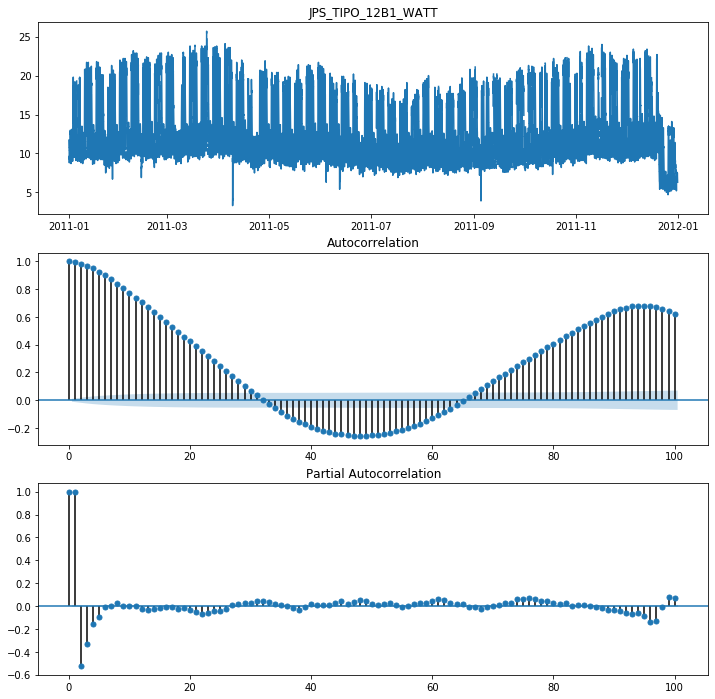

In [27]:
ano = '2011'
fig, ax = plt.subplots(3, )
ax[0].plot(jps.df[col][ano]) 
ax[0].set_title(col)
plot_acf(jps.df[col][ano].dropna(), ax=ax[1],lags =100)
plot_pacf(jps.df[col][ano].dropna(), ax=ax[2], lags = 100)

plt.show()

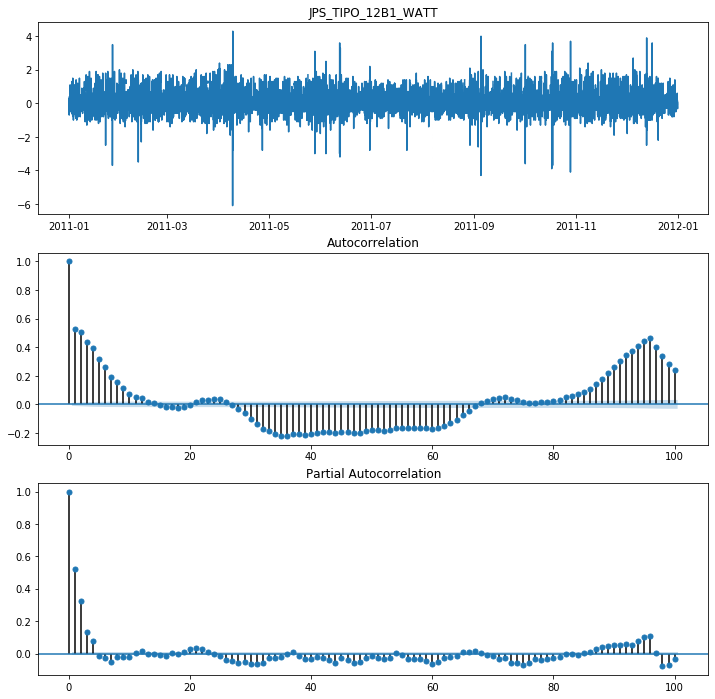

In [30]:
fig, ax = plt.subplots(3, )
ax[0].plot(jps.df[col][ano].diff()) 
ax[0].set_title(col)
plot_acf(jps.df[col][ano].diff().dropna(), ax=ax[1],lags = 100)
plot_pacf(jps.df[col][ano].diff().dropna(), ax=ax[2], lags = 100)

plt.show()

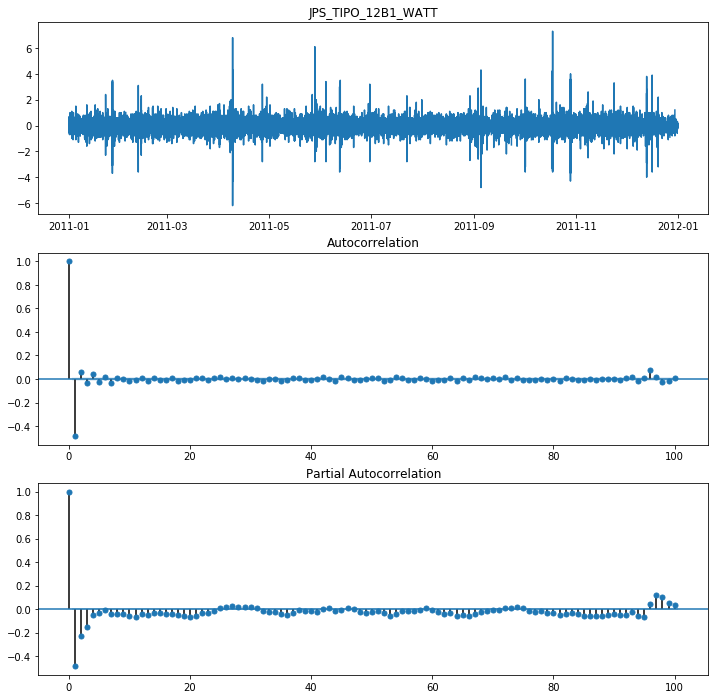

In [31]:
fig, ax = plt.subplots(3, )
ax[0].plot(jps.df[col][ano].diff().diff()) 
ax[0].set_title(col)
plot_acf(jps.df[col][ano].diff().diff().dropna(), ax=ax[1], lags = 100)
plot_pacf(jps.df[col][ano].diff().diff().dropna(), ax=ax[2], lags = 100)

plt.show()

In [41]:
miss11 = missingAnalysis(jps.df[ano])
miss11.count_gaps(jps.cols[1:2]) 

Gaps em ordem decrescente:
[[Timestamp('2011-01-14 08:45:00'), 61], [Timestamp('2011-09-18 08:00:00'), 31], [Timestamp('2011-01-06 07:45:00'), 25], [Timestamp('2011-05-10 11:00:00'), 23], [Timestamp('2011-09-15 14:45:00'), 19], [Timestamp('2011-10-09 21:30:00'), 19], [Timestamp('2011-04-06 16:00:00'), 17], [Timestamp('2011-02-03 23:45:00'), 13], [Timestamp('2011-10-15 15:30:00'), 11], [Timestamp('2011-10-26 14:00:00'), 11]]


In [42]:
gaps11 = miss11.gaps[jps.cols[1]]

In [43]:
gaps11.sort(key=lambda x : x[1], reverse = True)
gaps11

[[Timestamp('2011-01-14 08:45:00'), 61],
 [Timestamp('2011-09-18 08:00:00'), 31],
 [Timestamp('2011-01-06 07:45:00'), 25],
 [Timestamp('2011-05-10 11:00:00'), 23],
 [Timestamp('2011-09-15 14:45:00'), 19],
 [Timestamp('2011-10-09 21:30:00'), 19],
 [Timestamp('2011-04-06 16:00:00'), 17],
 [Timestamp('2011-02-03 23:45:00'), 13],
 [Timestamp('2011-10-15 15:30:00'), 11],
 [Timestamp('2011-10-26 14:00:00'), 11],
 [Timestamp('2011-10-04 23:00:00'), 9],
 [Timestamp('2011-11-14 14:15:00'), 9],
 [Timestamp('2011-12-01 23:15:00'), 9],
 [Timestamp('2011-09-30 07:15:00'), 7],
 [Timestamp('2011-11-14 16:45:00'), 7],
 [Timestamp('2011-12-27 13:00:00'), 7],
 [Timestamp('2011-12-27 14:15:00'), 7],
 [Timestamp('2011-02-23 17:45:00'), 5],
 [Timestamp('2011-03-26 15:30:00'), 5],
 [Timestamp('2011-09-11 06:45:00'), 5],
 [Timestamp('2011-09-11 10:30:00'), 5],
 [Timestamp('2011-09-15 11:30:00'), 5],
 [Timestamp('2011-09-19 03:30:00'), 5],
 [Timestamp('2011-02-22 16:15:00'), 3],
 [Timestamp('2011-03-10 15:15:

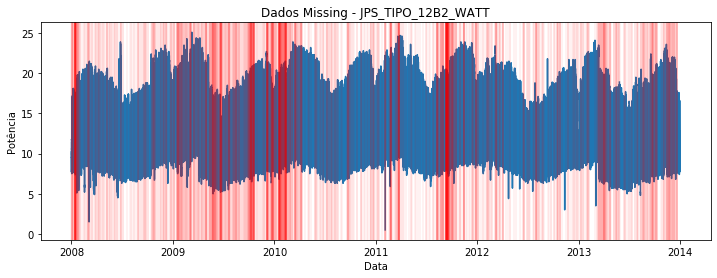

In [49]:
plt.figure(figsize = (12,4))
miss.plot_missing(jps.cols[1])

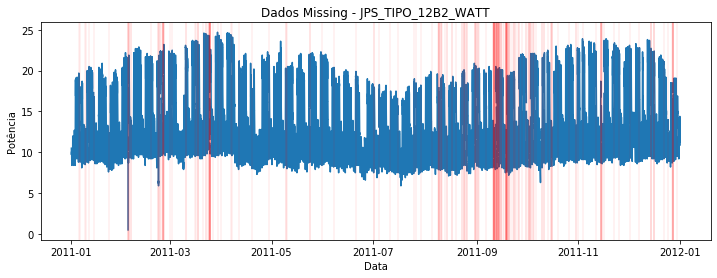

In [48]:
plt.figure(figsize = (12,4))
miss11.plot_missing(jps.cols[1])

In [76]:
df_imp = miss11.df[jps.cols[1]]
df_imp.tail()

data
2011-12-31 22:45:00    11.8
2011-12-31 23:00:00    11.5
2011-12-31 23:15:00    11.5
2011-12-31 23:30:00    11.3
2011-12-31 23:45:00    10.9
Name: JPS_TIPO_12B2_WATT, dtype: float64

In [114]:
df_int = df_imp.interpolate(limit=10, limit_direction='forward', limit_area='outside')
type(df_int)

pandas.core.series.Series

In [115]:
df_imp11 = pd.concat([df_imp, df_int], axis = 1)
df_imp11.columns = ['Original', 'Interpolado']
df_imp11.head()

,Original,Interpolado
data,,
2011-01-01 00:00:00,10.5,10.5
2011-01-01 00:15:00,10.1,10.1
2011-01-01 00:30:00,9.9,9.9
2011-01-01 00:45:00,9.9,9.9
2011-01-01 01:00:00,9.7,9.7


In [116]:
missInt = missingAnalysis(df_imp11)

In [117]:
missInt.count_gaps(missInt.df.columns.values)

Gaps em ordem decrescente:
[[Timestamp('2011-01-14 08:45:00'), 61], [Timestamp('2011-09-18 08:00:00'), 31], [Timestamp('2011-01-06 07:45:00'), 25], [Timestamp('2011-05-10 11:00:00'), 23], [Timestamp('2011-09-15 14:45:00'), 19], [Timestamp('2011-10-09 21:30:00'), 19], [Timestamp('2011-04-06 16:00:00'), 17], [Timestamp('2011-02-03 23:45:00'), 13], [Timestamp('2011-10-15 15:30:00'), 11], [Timestamp('2011-10-26 14:00:00'), 11]]
Gaps em ordem decrescente:
[[Timestamp('2011-01-14 08:45:00'), 61], [Timestamp('2011-09-18 08:00:00'), 31], [Timestamp('2011-01-06 07:45:00'), 25], [Timestamp('2011-05-10 11:00:00'), 23], [Timestamp('2011-09-15 14:45:00'), 19], [Timestamp('2011-10-09 21:30:00'), 19], [Timestamp('2011-04-06 16:00:00'), 17], [Timestamp('2011-02-03 23:45:00'), 13], [Timestamp('2011-10-15 15:30:00'), 11], [Timestamp('2011-10-26 14:00:00'), 11]]


In [203]:
from pandas.tseries.offsets import DateOffset
delta = missInt.gaps['Original'][1][1]
data = missInt.gaps['Original'][1][0]
#ini = data - DateOffset(minutes = 15*(delta))
fim = data + DateOffset(minutes = 15)
df_imp[data:data]
df_imp11['2011-01-06 08']

,Original,Interpolado
data,,
2011-01-06 08:00:00,NaN,NaN
2011-01-06 08:15:00,NaN,NaN
2011-01-06 08:30:00,NaN,NaN
2011-01-06 08:45:00,NaN,NaN


In [168]:
#delta = missInt.gaps['Original'][0][1]
data = missInt.gaps['Original'][0][0]

pd.Timestamp('2010-05-02 10:43:28') + DateOffset(minutes = 5)

Timestamp('2010-05-02 10:48:28')

In [159]:
data + DateOffset(month=3)

Timestamp('2011-03-05 20:45:00')

#### __Mês__

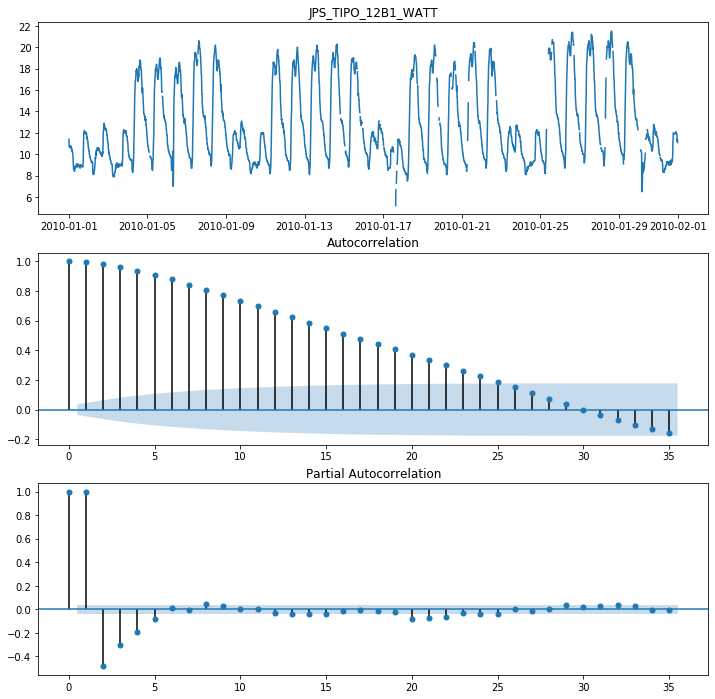

In [100]:
mes= '2010-01'
fig, ax = plt.subplots(3, )
ax[0].plot(jps.df[col][mes]) 
ax[0].set_title(col)
plot_acf(jps.df[col][mes].dropna(), ax=ax[1])
plot_pacf(jps.df[col][mes].dropna(), ax=ax[2])

plt.show()

#### __Semana__

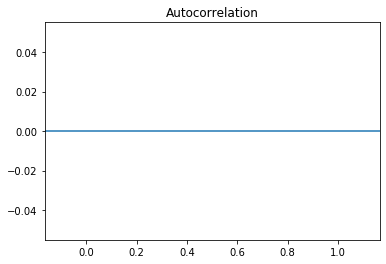

In [22]:
semana_ini = '2010-01-01'
semana_fim = '2010-01-07'
plot_acf(jps.df.loc[semana_ini:semana_fim][col])
plt.show()

#### __Dia__

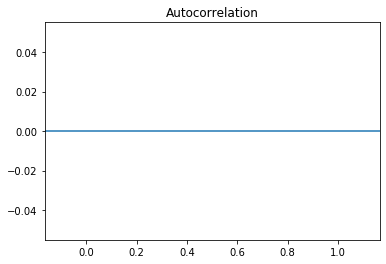

In [39]:
dia = '2010-01-01'

plot_acf(jps.df.loc[dia][col], lags=10)
plt.show()